In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Accidents_df = pd.read_csv("/Users/SulMac/Desktop/MiskDSI/PythonEDA/Barcelona-City-Planning/Data/accidents_2017.csv")
Deaths_df = pd.read_csv('/Users/SulMac/Desktop/MiskDSI/PythonEDA/Barcelona-City-Planning/Data/deaths.csv')

In [3]:
Accidents_df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [5]:
Accidents_df.dtypes


Id                    object
District Name         object
Neighborhood Name     object
Street                object
Weekday               object
Month                 object
Day                    int64
Hour                   int64
Part of the day       object
Mild injuries          int64
Serious injuries       int64
Victims                int64
Vehicles involved      int64
Longitude            float64
Latitude             float64
dtype: object

In [6]:
Accidents_df.shape

(10339, 15)

In [18]:
Accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [58]:
Accidents_df.corr()


,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,total injuries
Day,1.000000,0.012877,0.006975,-0.001686,0.006407,-0.010914,-0.017236,-0.006184,NaN
Hour,0.012877,1.000000,0.042420,-0.007614,0.040177,-0.022223,-0.006215,0.018699,NaN
Mild injuries,0.006975,0.042420,1.000000,-0.150482,0.974272,0.160052,0.008475,0.014091,NaN
Serious injuries,-0.001686,-0.007614,-0.150482,1.000000,0.071450,-0.015678,0.005372,0.000299,NaN
Victims,0.006407,0.040177,0.974272,0.071450,1.000000,0.157185,0.009355,0.013520,NaN
Vehicles involved,-0.010914,-0.022223,0.160052,-0.015678,0.157185,1.000000,-0.006864,0.002440,NaN
Longitude,-0.017236,-0.006215,0.008475,0.005372,0.009355,-0.006864,1.000000,0.396106,NaN
Latitude,-0.006184,0.018699,0.014091,0.000299,0.013520,0.002440,0.396106,1.000000,NaN
total injuries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
acc_per_month= Accidents_df.loc[:, ['Month','Victims']].groupby('Month').sum()
acc_per_month.head(12)

,Victims
Month,
April,936
August,803
December,898
February,942
January,991
July,1103
June,1087
March,1087
May,1092


In [17]:
acc_per_injury = Accidents_df.loc[:, ['Month','Serious injuries','Mild injuries']].groupby('Month').sum()
acc_per_injury.head(12)

,Serious injuries,Mild injuries
Month,,
April,23,912
August,10,793
December,13,883
February,17,925
January,14,975
July,22,1079
June,20,1067
March,15,1071
May,28,1063


In [76]:
inj_per_dist = Accidents_df.loc[:, ['District Name','Serious injuries','Mild injuries']].groupby('District Name').sum()
inj_per_dist


,Serious injuries,Mild injuries
District Name,,
Ciutat Vella,11,623
Eixample,60,3499
Gràcia,12,576
Horta-Guinardó,10,827
Les Corts,27,865
Nou Barris,13,647
Sant Andreu,11,693
Sant Martí,51,1593
Sants-Montjuïc,21,1305


# Visualizations


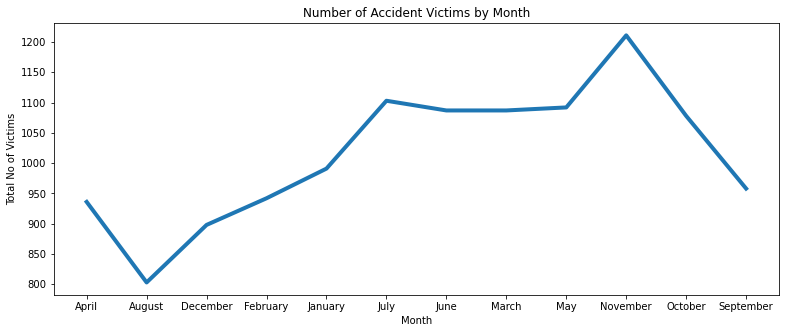

In [38]:
fig, ax = plt.subplots(figsize = (13,5))
ax.plot(acc_per_month.index, acc_per_month.Victims, linewidth = 4)
ax.set(title = 'Number of Accident Victims by Month', \
       xlabel = 'Month', ylabel = 'Total No of Victims');

In [40]:
acc_per_pod = Accidents_df.loc[:, ['Part of the day','Victims']]\
.groupby('Part of the day').agg(['sum']).squeeze()
acc_per_pod

Part of the day
Afternoon    6092
Morning      4712
Night        1382
Name: (Victims, sum), dtype: int64

<AxesSubplot:xlabel='Part of the day'>

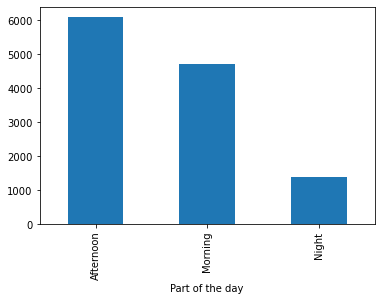

In [45]:
acc_per_pod.plot(kind = 'bar' , \
            x = acc_per_pod.index  , y = acc_per_pod.values)

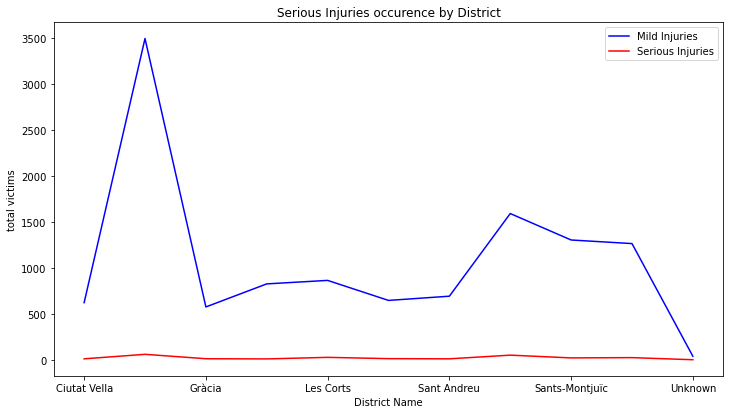

In [57]:
district = Accidents_df.loc[:, ['District Name','Mild injuries','Serious injuries','Victims']]
dist_check = district.groupby('District Name').agg(['sum'])


fig,ax = plt.subplots(figsize = (12,6.5))
a = dist_check['Mild injuries'].rename({'sum':'Mild Injuries'},axis =1).plot(ax=ax, color ='blue')
b = dist_check['Serious injuries'].rename({'sum':'Serious Injuries'},axis =1).plot(ax=ax, color = 'red')
ax.set(title = 'Serious Injuries occurence by District', ylabel = 'total victims')
ax.legend(loc = 'upper right', );

In [85]:
#This will show us the highest districts in terms of accidents , and the number of accidents from 2015 - 2017
acc_per_dist = Accidents_df.loc[:, ['District Name','Victims']].groupby('District Name').count()
apd = acc_per_dist.sort_values(by=['Victims'], ascending=False )
apd

,Victims
District Name,
Eixample,3029
Sant Martí,1336
Sants-Montjuïc,1104
Sarrià-Sant Gervasi,1104
Horta-Guinardó,743
Les Corts,726
Ciutat Vella,600
Sant Andreu,597
Nou Barris,542


In [6]:
Deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               4599 non-null   int64 
 1   District.Code      4599 non-null   int64 
 2   District.Name      4599 non-null   object
 3   Neighborhood.Code  4599 non-null   int64 
 4   Neighborhood.Name  4599 non-null   object
 5   Age                4599 non-null   object
 6   Number             4599 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 251.6+ KB


In [8]:
Deaths_df.isnull()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,False
4595,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False


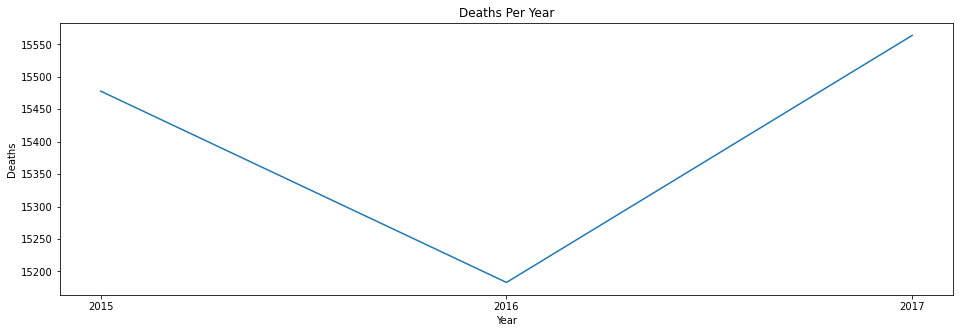

In [37]:
DeathsPerYear = Deaths_df.groupby('Year')['Number'].sum().reset_index()
ax = sns.lineplot(x="Year", y="Number", data=DeathsPerYear)
ax.set_xticks(DeathsPerYear.Year)
ax.set_title('Deaths Per Year')
ax.set_ylabel('Deaths')
fig=plt.gcf()
fig.set_size_inches(16,5)

In [14]:
Deaths_df.groupby('Year')['Number'].sum()

Year
2015    15478
2016    15183
2017    15564
Name: Number, dtype: int64

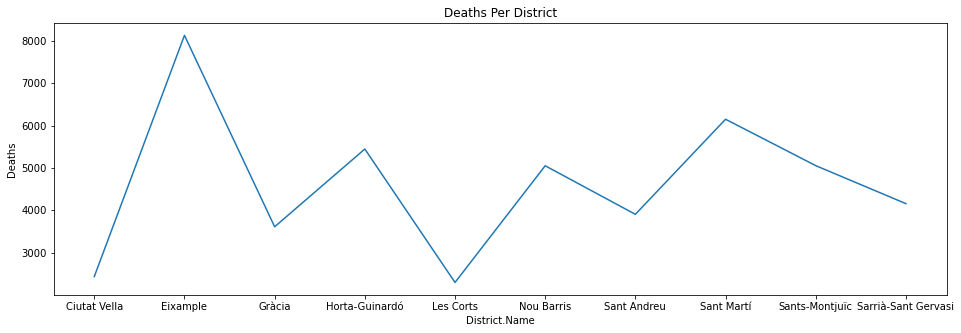

In [47]:
#Deaths_df.groupby('District.Name')['Number'].sum()
DeathsPerDist = Deaths_df.groupby('District.Name')['Number'].sum().reset_index()
ax = sns.lineplot(x="District.Name", y="Number", data=DeathsPerDist)
ax.set_xticks(DeathsPerDist['District.Name'])
ax.set_title('Deaths Per District')
ax.set_ylabel('Deaths')
fig=plt.gcf()
fig.set_size_inches(16,5)

In [50]:
#This will show us the highest districts in terms of deaths , and the number of deaths from 2015 - 2017
DPD = DeathsPerDist.sort_values(by=['Number'], ascending=False )
DPD

,District.Name,Number
1,Eixample,8128
7,Sant Martí,6148
3,Horta-Guinardó,5445
8,Sants-Montjuïc,5053
5,Nou Barris,5050
9,Sarrià-Sant Gervasi,4156
6,Sant Andreu,3904
2,Gràcia,3610
0,Ciutat Vella,2435
4,Les Corts,2296
